In [4]:
import warnings
warnings.filterwarnings(action='ignore') 

# 모델 평가
모델의 성능을 평가한다. 평가결과에 따라 프로세스를 다시 반복한다.
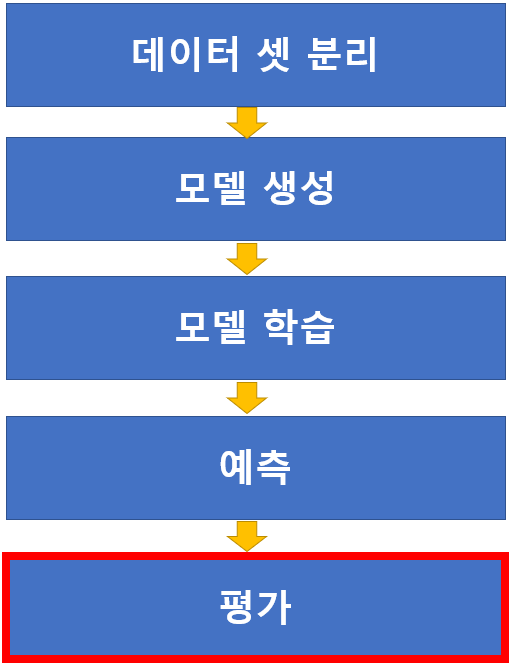

## 분류와 회귀의 평가방법

### 분류 평가 지표
1. 정확도 (Accuracy)
1. 정밀도 (Precision)
1. 재현률 (Recall)
1. F1점수 (F1 Score)
1. PR Curve, AP
1. ROC, AUC

### 회귀 평가방법
1. MSE (Mean Squared Error)
1. RMSE (Root Mean Squared Error)
1. $R^2$ (결정계수)

### sckit-learn 평가함수 모듈
- sklearn.metrics 모듈을 통해 제공

# 분류(Classification) 평가 지표

##  양성과 음성
- 양성(Positive): 모델이 찾으려는 주 대상
- 음성(Negative): 모델이 찾으려는 주 대상이 아닌 것
- 예
    - 환자 분류 
        - 양성 - 환자, 음성 - 정상인
    - 스팸메일 분류 
        - 양성 - 스팸메일, 음성 - 정상메일
    - 금융사기 모델
        - 양성 - 사기거래, 음성 - 정상거래
        

## 정확도 (Accuracy)
- 대표적인 분류의 평가 지표


$$
\large{
정확도 (Accuracy) = \cfrac{맞게 예측한 건수} {전체 예측 건수}
}
$$

- 전체 예측 한 것중 맞게 예측한 비율로 평가한다.
- `accuracy_score(정답, 모델예측값)`

### Accuracy 평가지표의 문제
- 양성(Positive)에 대한 지표만 확인 할수 없다. 
- 불균형 데이터의 경우 정확한 평가지표가 될 수 없다.
    - 예: 양성과 음성의 비율이 1:9 인 경우 모두 음성이라고 하면 정확도는 90%가 된다.

## MNIST Data set
- 손글씨 숫자 데이터 셋
    - 미국 국립표준연구소(NIST) 에서 수집한 손글씨 숫자(0 ~ 9) 데이터셋을 수정한 이미지 데이터셋.
- 사이킷런 제공 image size: 8 X 8 
    - 원본 데이터는 28 X 28 크기로 train 60,000장, test 10,000 장을 제공한다.
- https://ko.wikipedia.org/wiki/MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4

### mnist 데이터 셋 로드 및 확인

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

In [6]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [7]:
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [8]:
X = digits.data
y = digits.target
X.shape, y.shape

((1797, 64), (1797,))

##### label의 클래스별 빈도수 확인

In [9]:
np.unique(y, return_counts=True) #(고유값을 가진 배열, 개수)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64))

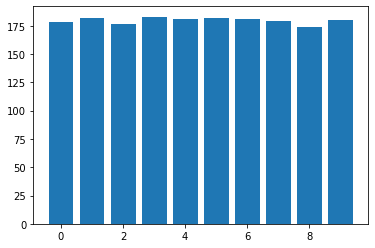

In [10]:
plt.bar(np.unique(y, return_counts=True)[0],np.unique(y, return_counts=True)[1])
plt.show()

##### image 확인

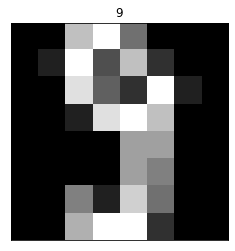

In [11]:
img_idx = 125 #보려는 그림의 index
#이미지를 보기위해 2차원으로 변환
img = X[img_idx].reshape(8,8) #data기 1차원으로 되어있어 2차원으로 변경
plt.imshow(img, cmap='gray') #출력

plt.title(y[img_idx]) #정답을 title
plt.xticks([]) 
plt.yticks([]) 
plt.show() 

In [12]:
img

array([[ 0.,  0., 12., 16.,  7.,  0.,  0.,  0.],
       [ 0.,  2., 16.,  5., 12.,  3.,  0.,  0.],
       [ 0.,  0., 14.,  6.,  3., 16.,  2.,  0.],
       [ 0.,  0.,  2., 14., 16., 12.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 10., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 10.,  8.,  0.,  0.],
       [ 0.,  0.,  8.,  2., 13.,  7.,  0.,  0.],
       [ 0.,  0., 11., 16., 16.,  3.,  0.,  0.]])

### 불균형 데이터셋으로 만들기
- y를 9와 나머지로 변경한다.
- Positive(양성 - 1): 9
- Negative(음성 - 0): 0 ~ 8

In [13]:
#조건에 맞는 원소 1로 반환 하고 조건에 맞지 않으면 0반환
y = np.where(y==9, 1, 0)

In [14]:
y_pct = np.unique(y, return_counts=True)
y_pct

(array([0, 1]), array([1617,  180], dtype=int64))

In [15]:
#y.size는 len(y)와 동일
#0과 1의 비율
y_pct[1]/y.size #배열.size : 원소개수

array([0.89983306, 0.10016694])

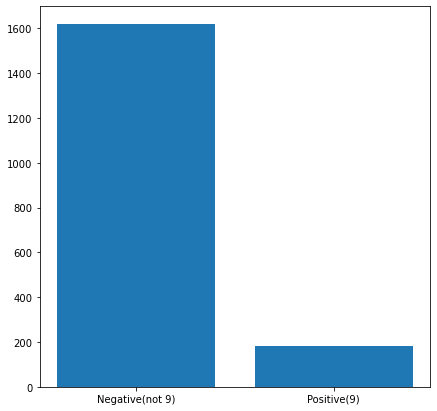

In [16]:
plt.figure(figsize=(7,7))
plt.bar(y_pct[0], y_pct[1])
plt.xticks([0,1], labels=['Negative(not 9)','Positive(9)']) 
plt.show()

### 데이터셋 분할
- train/test 로 분할

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,  random_state=0)

print(np.unique(y_train, return_counts=True)[1]/y_train.size)
print(np.unique(y_test, return_counts=True)[1]/y_test.size)

[0.89977728 0.10022272]
[0.9 0.1]


### 모델 생성 및 학습

#### Dummy Model 정의
- Target Label중 무조건 최빈값으로 예측하는 모델을 정의한다.

In [18]:
import pandas as pd
import numpy as np

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

In [19]:
#dummy = 목업같은 것
#y값 중 빈도수가 제일 높은 class로 예측
dummy_model = DummyClassifier(strategy='most_frequent') 


dummy_model.fit(X_train, y_train)

pred_train_dummy = dummy_model.predict(X_train)
pred_test_dummy = dummy_model.predict(X_test)

train_acc = accuracy_score(y_train, pred_train_dummy)
test_acc = accuracy_score(y_test, pred_test_dummy)
print(f"훈련데이터 정확도 {train_acc}, 테스트데이터 정확도: {test_acc}") 
#위와 동일한 결과
#0은 잘맞추지만 1은 하나도 못맞춤
#정확도를 사용하는 것은 부적절함

훈련데이터 정확도 0.8997772828507795, 테스트데이터 정확도: 0.9


아무 학습도 하지 않았고 단순히 다수 Label을 정답으로 예측 했는데 90% 정확도(accuracy)라는 괜찮은 성능이 나옴.  
그런데 이게 좋은 모델인가?    
비록 정확도는 90%(0.9) 이지만 10%(0.1)의 **9**는 아예 분류하지 못한다. 우리가 찾으려는 대상(positive)이 9일 경우 하나도 분류해 내지 못하는 모델이 된다.     
그래서 **불균형 레이블 데이터세트**의 평가지표로 정확도만 보면 안된다. 특히 Positive에 대한 예측이 중요한 경우에는 accuracy는 알맞은 평가 지표가 아니다.

## 혼동 행렬(Confusion Marix)
- 실제 값과 예측 한 것을 표로 만든 평가표
    - 분류의 예측 결과가 몇개나 맞고 틀렸는지를 확인할 때 사용한다.
- 함수: confusion_matrix(정답, 모델예측값)
- 결과의 0번축: 실제 class, 1번 축: 예측 class
- 아래의 표는 sklearn기준 표
- 앞에는 불린값(예측한 값과 실제값이 일치하는지), 뒤에는 예측한 값

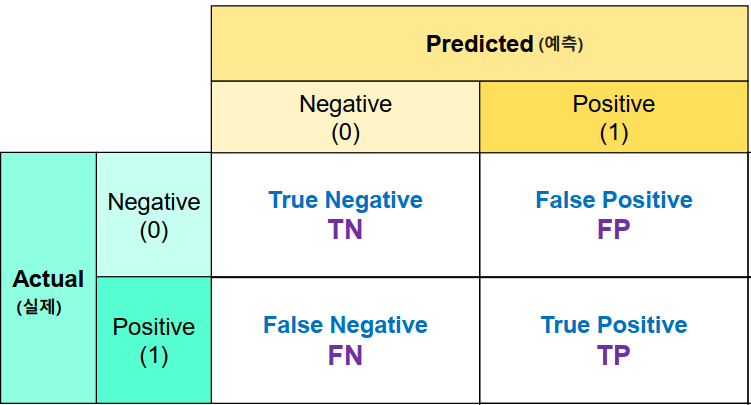

- **TP(True Positive)** 
    - 양성으로 예측했는데 맞은 개수
- **TN(True Negative)** 
    - 음성으로 예측했는데 맞은 개수
- **FP(False Positive)** 
    - 양성으로 예측했는데 틀린 개수 
    - 음성을 양성으로 예측
- **FN(False Negative)** 
    - 음성으로 예측했는데 틀린 개수 
    - 양성을 음성으로 예측

- 예)
```python
[[20, 6],
 [4,  40]]
```

## 이진 분류 평가지표

### 양성(Positive) 예측력 측정 평가지표
- **Accuracy (정확도)** 
    - 전체 데이터 중에 맞게 예측한 것의 비율
- **Recall/Sensitivity(재현율/민감도)** 
    - 실제 Positive(양성)인 것 중에 Positive(양성)로 예측 한 것의 비율
    - **TPR**(True Positive Rate) 이라고도 한다.
    - ex) 스팸 메일 중 스팸메일로 예측한 비율. 금융사기 데이터 중 사기로 예측한 비율
- **Precision(정밀도)**
    - Positive(양성)으로 예측 한 것 중 실제 Positive(양성)인 비율
    - **PPV**(Positive Predictive Value) 라고도 한다.
    - ex) 스팸메일로 예측한 것 중 스팸메일의 비율. 금융 사기로 예측한 것 중 금융사기인 것의 비율

- **F1 점수**
    - 정밀도와 재현율의 조화평균 점수
    - recall과 precision이 비슷할 수록 높은 값을 가지게 된다. F1 score가 높다는 것은 recall과 precision이 한쪽으로 치우쳐저 있이 않고 둘다 좋다고 판단할 수 있는 근거가 된다.

### 음성(Negative) 예측력 측정 평가지표
- **Specificity(특이도)**
    - 실제 Negative(음성)인 것들 중 Negative(음성)으로 맞게 예측 한 것의 비율
    - **TNR**(True Negative Rate) 라고도 한다.
- **Fall out(위양성률)**
    - 실제 Negative(음성)인 것들 중 Positive(양성)으로 잘못 예측한 것의 비율. `1 - 특이도`
    - **FPR** (False Positive Rate) 라고도 한다.
    - $Fall Out(FPF) = \cfrac{FP}{TN+FP}$

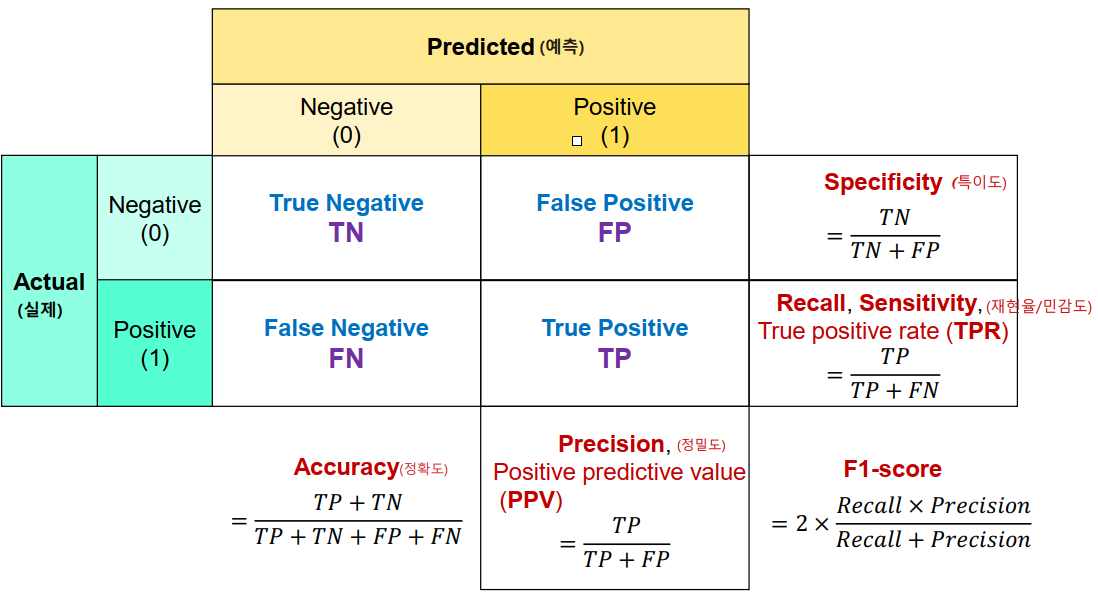

## 각 평가 지표 계산 함수
- sklearn.metrics 모듈
- numpy 배열로 반환
- plot_confusion_matrix() 표 그리기
- **confusion_matrix(y 실제값, y 예측값)/plot_confusion_matrix()**
    - 혼돈 행렬 반환
- **recall_score(y 실제값, y 예측값)**
  - Recall(재현율) 점수 반환 (Positive 중 Positive로 예측한 비율 (TPR))
- **precision_score(y 실제값, y 예측값)**
  - Precision(정밀도) 점수 반환 (Positive로 예측한 것 중 Positive인 것의 비율 (PPV))
- **f1_score(y 실제값, y 예측값)**
    - F1 점수 반환 (recall과 precision의 조화 평균값)
- **classification_report(y 실제값, y 예측값)**
    - 클래스 별로 recall, precision, f1 점수와 accuracy를 종합해서 보여준다.

###   Dummy 모델 혼동행렬

In [20]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

In [21]:
print('Train confusion matrix')
print(confusion_matrix(y_train, pred_train_dummy))
print("-"*50)
print('Test confusion matrix')
print(confusion_matrix(y_test, pred_test_dummy))

Train confusion matrix
[[1212    0]
 [ 135    0]]
--------------------------------------------------
Test confusion matrix
[[405   0]
 [ 45   0]]


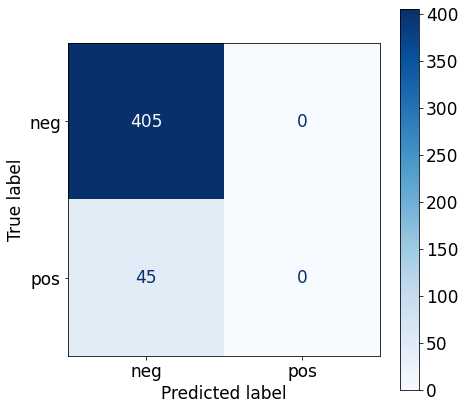

In [22]:
import matplotlib as mpl
mpl.rcParams['font.size']=17
_, ax = plt.subplots(1,1,figsize=(7,7))
#sklearn
plot_confusion_matrix(dummy_model, #모델 
                      X_test,  #X값
                      y_test,  #y값
                      display_labels=['neg','pos'],
                      cmap=plt.cm.Blues,
                      values_format='d', #숫자포맷, d:정수형으로 표시
                      ax=ax
                     )

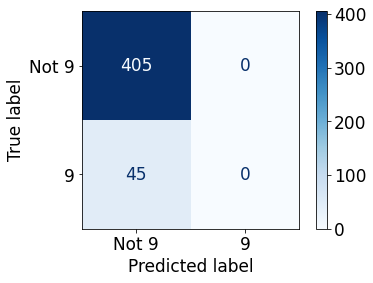

In [23]:
#confusion_matrix값을 주고 바로 그래프 그리기
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred_test_dummy)

disp = ConfusionMatrixDisplay(cm, #confusion_matrix 
                              display_labels=['Not 9','9']) #['음성레이블', '양성레이블']
disp.plot(cmap='Blues')

### dummy 모델 Accuracy, Recall, Precision, F1-Score

In [24]:
print("Accuracy")
accuracy_score(y_train,pred_train_dummy), accuracy_score(y_test, pred_test_dummy)

Accuracy


(0.8997772828507795, 0.9)

In [25]:
print("Recall") 
recall_score(y_train, pred_train_dummy), recall_score(y_test, pred_test_dummy)
#0이 나왔다는건 positive로 맞춘게 하나도 없다는 것

Recall


(0.0, 0.0)

In [26]:
print('Precision')
precision_score(y_train, pred_train_dummy), precision_score(y_test, pred_test_dummy)
#0이 나왔다는건 0이라고 예측한것 중 맞춘게 하나도 없다는 것

Precision


(0.0, 0.0)

In [27]:
#평가지표는 주로 recall과 precision을 중심으로 봄

In [28]:
print('f1 score')
f1_score(y_train, pred_train_dummy), f1_score(y_test, pred_test_dummy)


f1 score


(0.0, 0.0)

### TODO 머신 모델을 이용해 학습
- DecisionTreeClassifier 사용(max_depth=3)
- 모델생성
- 학습(train)
- 평가(train/test)
    - accuracy, recall, precision, f1 score, confusion_matrix 확인

In [29]:
from sklearn.tree import DecisionTreeClassifier
#앙상블 모델
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, confusion_matrix, ConfusionMatrixDisplay

In [38]:
#모델생성
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
#n_estimators= DecisionTree를100 개를 만들라는 것
rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)


#학습
tree.fit(X_train, y_train)
rf.fit(X_train, y_train);
#리턴값 보기 싫을 때 ;를 맨 뒤에(단 주피터노트북에서만 가능)

#추론
pred_train_tree= tree.predict(X_train)
pred_test_tree = tree.predict(X_test)

pred_train_rf = rf.predict(X_train)
pred_test_rf = rf.predict(X_test)

In [52]:
#confusion matrix 
print('Tree : train set')
print(confusion_matrix(y_train, pred_train_tree))
print("-" * 30)
print(confusion_matrix(y_test, pred_test_tree))    

Tree : train set
[[1167   45]
 [  27  108]]
------------------------------
[[394  11]
 [ 11  34]]


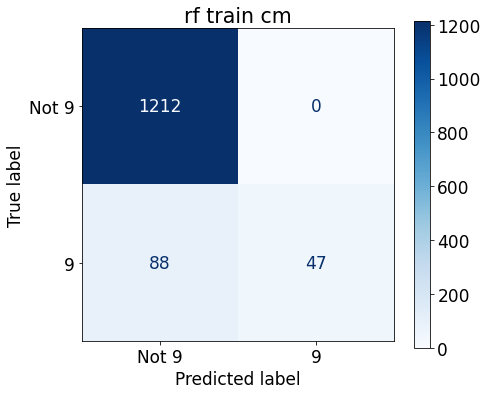

In [40]:
#test set
#print(confusion_matrix(y_train, pred_train_rf))
#그래프 크기 변경
#axis에 그림을 그리고 figure에 담는 것임
plt.figure(figsize=(7,6))
ax=plt.gca()

cm=confusion_matrix(y_train, pred_train_rf)
disp = ConfusionMatrixDisplay(cm, display_labels=['Not 9', '9'])
disp.plot(cmap='Blues', ax=ax)
plt.title('rf train cm')
plt.show()
#print(confusion_matrix(y_test, pred_train_rf))

In [41]:
def display(y, pred, title):
    """
    confusion matrix 시각화 함수
    [파라미터]
      y: ndarray - 정답(Ground Truth)
      pred:ndarray - 모델이 예측한 값
      title: str- 그래프의 제목
    [Return]
    [Exception]
    """
    plt.figure(figsize=(7,6))
    ax=plt.gca()

    cm=confusion_matrix(y, pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=['Not 9', '9'])
    disp.plot(cmap='Blues', ax=ax)
    plt.title(title)
    plt.show()

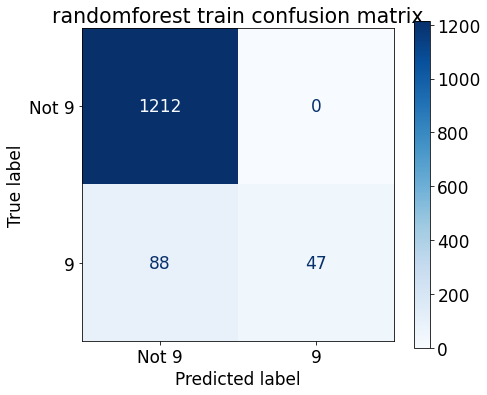

In [42]:
display(y_train, pred_train_rf, 'randomforest train confusion matrix')

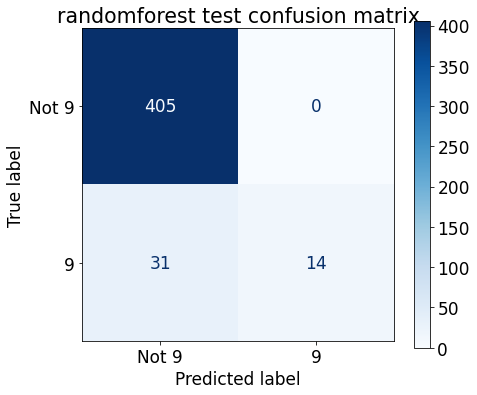

In [43]:
display(y_test, pred_test_rf, 'randomforest test confusion matrix')

In [44]:
#평가지표 출력
print('tree_train')
accuracy_score(y_train, pred_train_tree), recall_score(y_train, pred_train_tree)


tree_train


(0.9465478841870824, 0.8)

In [45]:
#평가지표  출력 함수
def print_metrics_classifier(y, pred, title):
    """
    accuracy, recall, precision, f1점수를 출력하는 함수
    [parameter]
      y: ndarray - 정답(Ground Truth)
      pred:ndarray - 모델이 예측한 값
      title:str - 제목
    [return]
    [exception]
    """
    print(title)
    print('정확도(accuracy): ', accuracy_score(y, pred))
    print('재현률(recall)', recall_score(y, pred))
    print('정밀도(precision):', precision_score(y, pred))
    print('f1 score:', f1_score(y, pred))

In [46]:
print_metrics_classifier(y_train, pred_train_tree, 'tree_train')

tree_train
정확도(accuracy):  0.9465478841870824
재현률(recall) 0.8
정밀도(precision): 0.7058823529411765
f1 score: 0.7500000000000001


In [47]:
print_metrics_classifier(y_test, pred_test_tree, 'tree_test')

tree_test
정확도(accuracy):  0.9511111111111111
재현률(recall) 0.7555555555555555
정밀도(precision): 0.7555555555555555
f1 score: 0.7555555555555555


In [48]:
print_metrics_classifier(y_train, pred_train_rf, 'rf_train')
#재현률로 보아 실제 9인건 35퍼 정도밖에 못맞춤

rf_train
정확도(accuracy):  0.9346696362286563
재현률(recall) 0.34814814814814815
정밀도(precision): 1.0
f1 score: 0.5164835164835165


In [49]:
print_metrics_classifier(y_test, pred_test_rf, 'rf_test')

rf_test
정확도(accuracy):  0.9311111111111111
재현률(recall) 0.3111111111111111
정밀도(precision): 1.0
f1 score: 0.4745762711864407


### classification_report()
- Accuracy와 각 class가 Positive일 때의 recall, precision, f1-score를 한번에 보여주는 함수

In [50]:
from sklearn.metrics import classification_report

result = classification_report(y_test, #정답
                               pred_test_rf, #예측한 값 
                               target_names=['pos(not 9)', 'pos(9)']) #0과 1의 label(생략 0,1)
print(result) #반드시 print 형태로 출력 
#pos(not 9) 는 0이 positive일때 지표
#pos(9)는 1이 positive일때 지표

              precision    recall  f1-score   support

  pos(not 9)       0.93      1.00      0.96       405
      pos(9)       1.00      0.31      0.47        45

    accuracy                           0.93       450
   macro avg       0.96      0.66      0.72       450
weighted avg       0.94      0.93      0.91       450



## 재현율과 정밀도의 관계

**이진 분류의 경우 Precision(정밀도)가 중요한 경우와 Recall(재현율) 중요한 업무가 있다.**

### 재현율이 더 중요한 경우
- 실제 Positive 데이터를 Negative 로 잘못 판단하면 업무상 큰 영향이 있는 경우. 
- FN(False Negative)를 낮추는데 촛점을 맞춘다.
- 암환자 판정 모델, 보험사기적발 모델

### 정밀도가 더 중요한 경우
- 정상메일을 스팸메일로 분류할 경우(=실제 Negative 데이터를 Positive 로 잘못 판단)
- 실제 Negative 데이터를 Positive 로 잘못 판단하면 업무상 큰 영향이 있는 경우.
- FP(False Positive)를 낮추는데 초점을 맞춘다.
- 스팸메일 판정

## 임계값(Threshold) 변경을 통한 재현율, 정밀도 변환
- 후처리

- **임계값(Threshold)**
    - 모델이 분류 Label을 결정할 때 기준이 되는 확률 기준값.
- 정밀도나 재현율을 특히 강조해야 하는 상황일 경우 임계값 변경을 통해 평가 수치를 올릴 수있다.
- 단 극단적으로 임계점을 올리나가 낮춰서 한쪽의 점수를 높이면 안된다.
    - 예: 환자 여부 예측시 재현율을 너무 높이면 정밀도가 낮아져 걸핏하면 정상인을 환자로 예측하게 된다.
    

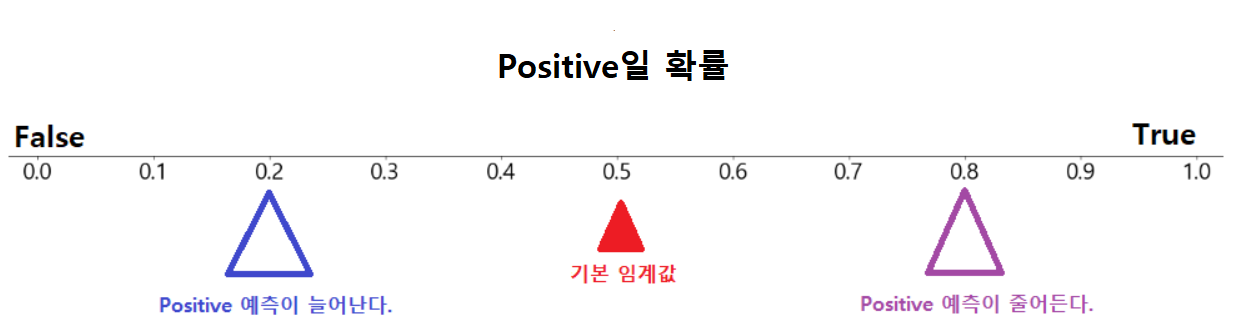

- Positive일 확률이 임계값 이상이면 Positive, 미만이면 Negative로 예측한다.
- 좌측의 pos 임계값이 0.2일 경우 pos로 분류할 확률은 0.2이므로 20퍼센트만 되면 pos라고 분류.
- 임계값을 높이면 정밀도가 올라감. (=정말 확실하게 아니고선 pos라고 분류하지 않겠다)
  이러면 진짜 pos도 neg로 분류하는 경우가 늘어남 대신 재현률은 떨어짐.

### 임계값 변경에 따른  정밀도와 재현율 변화관계
- 임계값을 높이면 양성으로 예측하는 기준을 높여서(엄격히 해서) 음성으로 예측되는 샘플이 많아 진다. 그래서 정밀도는 높아지고 재현율은 낮아진다.
- 임계값을 낮추면 양성으로 예측하는 기준이 낮아져서 양성으로 예측되는 샘플이 많아 진다. 그래서 재현율은 높아지고 정밀도는 낮아진다.
- 정리
    - **임계값을 낮추면 재현율은 올라가고 정밀도는 낮아진다.**
    - **임계값을 높이면 재현율은 낮아지고 정밀도는 올라간다.**
- 임계값을 변화시켰을때 **재현율과 정밀도는 반비례 관계를 가진다.**
- 임계값을 변화시켰을때 **재현율과 위양성율(Fall-Out/FPR)은 비례 관계를 가진다.**

### 임계값 변화에 따른 recall, precision 변화

##### 분류 모델의 추론 메소드
- model.predict(X)
    - 추론한 X의 class를 반환
- model.predict_proba(X)
    - 추론한 X의 class별 확률을 반환

In [54]:
tree.predict_proba(X_test)[:5] 

array([[0.99173554, 0.00826446],
       [0.98695652, 0.01304348],
       [0.98695652, 0.01304348],
       [0.98695652, 0.01304348],
       [0.98695652, 0.01304348]])

In [55]:
tree.predict(X_test)[:5]

array([0, 0, 0, 0, 0])


- 1행의 경우 0일 확률이 0.9917로 predict를 진행하게 되면 0으로 예측하게 됨.
- 2행부터 5행까지도 이하동일

##### 임계값 변화에 따른 recall/precision 확인
- **precision_recall_curve(y_정답, positive_예측확률)** 이용
    - 반환값: Tuple - (precision리스트, recall리스트, threshold리스트) 
        - threshold(임계값) 0에서 1까지 변경하며 변화되는 precsion과 recall값을 반환

In [56]:
#precision_recall_curve
from sklearn.metrics import precision_recall_curve
#(1)pos일 확률만 추출(450,2) / 1일 확률인 인덱스만 가져옴
pos_proba = tree.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, pos_proba)
#threshold 마지막에 1이 생략됨. precision과 recall은 threshold 1일 때 결과를 가지고 있음.

print(precisions.shape, recalls.shape, thresholds.shape) 
#threshold 맨 마지막은 1인데 생략해서 8개가 아니고 7개


(8,) (8,) (7,)


In [57]:
thresholds = np.append(thresholds, 1) #threshold 1을 추가
print(precisions.shape, recalls.shape, thresholds.shape) 

(8,) (8,) (8,)


In [58]:
import pandas as pd
pd.DataFrame({
    'threshold':thresholds,
    'precision':precisions,
    'recall':recalls
})

#임계값이 바뀌는 시점에 따라 precision과 recall 변화 확인
#threshold 가 1일 때 맞춘건 하나도 없으므로 recall(실제 pos값 대비 예측pos한)이 0

,threshold,precision,recall
0,0.008264,0.100000,1.000000
1,0.013043,0.107579,0.977778
2,0.033898,0.431818,0.844444
3,0.040000,0.513889,0.822222
4,0.149254,0.560606,0.822222
5,0.545455,0.755556,0.755556
6,0.750000,0.823529,0.622222
7,1.000000,1.000000,0.000000


###### plotting

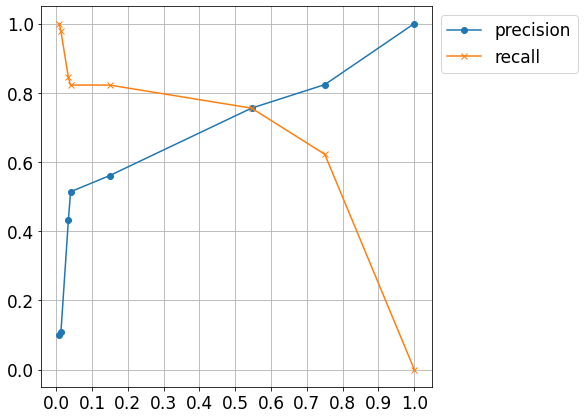

In [59]:
plt.figure(figsize=(7,7))
plt.plot(thresholds, precisions, marker='o', label='precision') #y: precision
plt.plot(thresholds, recalls, marker='x', label='recall') #y:recall

plt.xticks(np.arange(0, 1.1, 0.1)) 
plt.grid(True)
#범례위치 조작
#plt.legend(loc='upper left', bbox_to_anchor=(1,1))
#plt.legend(loc='upper left', bbox_to_anchor=(1,0.6))
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

In [ ]:
#recall을 높이기 위해선 threshold를 낮춘다
#본인이 threshold값을 수정해(후처리) 0과 1로 나누는 결과를 달리할 수 있음.

### Binarizer - 임계값 변경
- Transformer로 설정한 임계점 보다 작으거나 같으면 0, 크면 1로 변환하는 변환기
- Binarizer를 이용해 원하는 임계값을 설정하여 양성/음성 분류기준을 변경할 수 있다.

##### Binarizer 간단 예제

In [60]:
from sklearn.preprocessing import Binarizer

In [67]:
exam = [[0.3, 0.7,0.4, 0.6]]

#binarizer = Binarizer(threshold=0.1) #0.1 이하는 0 초과는 1로 변환
#binarizer = Binarizer(threshold=0.5) #0.5 이하는 0 초과는 1로 변환
binarizer = Binarizer(threshold=0.7) #0.7이하는 0 초과는 1로 변환

binarizer.fit_transform(exam) 

array([[0., 0., 0., 0.]])

In [68]:
#true는 0으로 false는 1로
#이 방법은 반드시 numpy배열로 가능
exam = np.array(exam)
th=0.5
np.where(exam <= th, 0, 1)

array([[0, 1, 0, 1]])

##### 모델 예측 결과에 적용

In [62]:
binarizer1 = Binarizer(threshold=0.1) 
binarizer2 = Binarizer(threshold=0.4) 
pred_proba = tree.predict_proba(X_test)

pred_test_tree2 = binarizer1.fit_transform(pred_proba)[:, 1] 
pred_test_tree3 = binarizer2.fit_transform(pred_proba)[:, 1]  

print('결정트리 - 임계값(0.1)')
print(recall_score(y_test, pred_test_tree2), precision_score(y_test, pred_test_tree2))
print('결정트리 - 임계값(0.4)')
print(recall_score(y_test, pred_test_tree3), precision_score(y_test, pred_test_tree3))


결정트리 - 임계값(0.1)
0.8222222222222222 0.5606060606060606
결정트리 - 임계값(0.4)
0.7555555555555555 0.7555555555555555


In [69]:
print_metrics_classifier(y_test, pred_test_tree2, 'th 0.1')

th 0.1
정확도(accuracy):  0.9177777777777778
재현률(recall) 0.8222222222222222
정밀도(precision): 0.5606060606060606
f1 score: 0.6666666666666666


In [70]:
print_metrics_classifier(y_test, pred_test_tree3, 'th 0.4')

th 0.4
정확도(accuracy):  0.9511111111111111
재현률(recall) 0.7555555555555555
정밀도(precision): 0.7555555555555555
f1 score: 0.7555555555555555


## PR Curve(Precision Recall Curve-정밀도 재현율 곡선)와 AP Score(Average Precision Score)
- Positive 확률 0~1사이의 모든 임계값에 대하여 재현율(recall)과 정밀도(precision)의 변화를 이용한 평가 지표
- X축에 재현율, Y축에 정밀도를 놓고 임계값이 1 → 0 변화할때 두 값의 변화를 선그래프로 그린다.
- AP Score
    - PR Curve의 성능평가 지표를 하나의 점수(숫자)로 평가한것.
    - PR Curve의 선아래 면적을 계산한 값으로 높을 수록 성능이 우수하다.
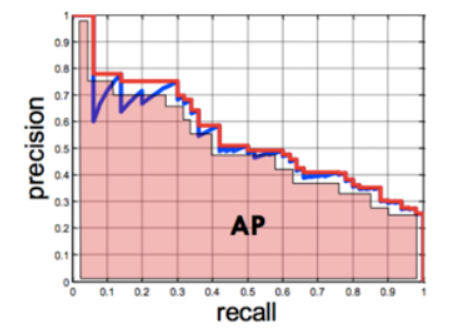   

In [ ]:
#recall이 증가할 때 precision은 떨어지지만 최대한 높은값을 유지하다 
#떨어지는 모델의 강건성이 더 있다고 봄

#그래프로 봤을 때 어떤 모델이 더 나은지 분간이 안될 경우 
#그래프내의 커브 내 면적의 값이 큰 것을 좋은 모델로 봄(average_precision_score)

#강건하다는것은 실제 양성인 것과 양성으로 예측한 것도 틀리지 않는다는 것
#즉 양성인 것들을 잘 맞춘다고 해석할 수 있음
#단 여기서 gative에 대한 성능은 안나옴


In [73]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, average_precision_score

#decision tree/randomforest 모델을 이용해 positive 확률

tree_pos = tree.predict_proba(X_test)[:, 1]
rf_pos= rf.predict_proba(X_test)[:, 1]

precision1, recall1, threshold1 = precision_recall_curve(y_test, tree_pos) #정답, pos 확률

print(precision1.shape, recall1.shape, threshold1.shape)

(8,) (8,) (7,)


In [79]:
print(recall1)
print(precision1)
print(threshold1)

[1.         0.97777778 0.84444444 0.82222222 0.82222222 0.75555556
 0.62222222 0.        ]
[0.1        0.10757946 0.43181818 0.51388889 0.56060606 0.75555556
 0.82352941 1.        ]
[0.00826446 0.01304348 0.03389831 0.04       0.14925373 0.54545455
 0.75      ]


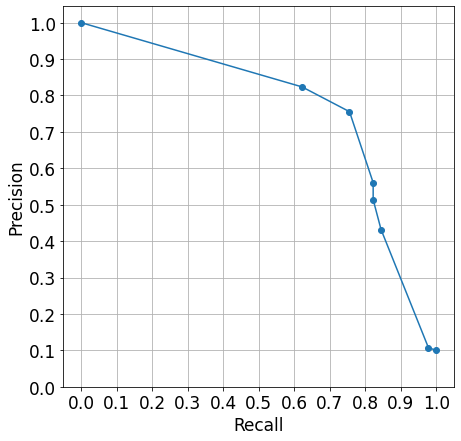

In [80]:
plt.figure(figsize=(7,7))
threshold1
plt.plot(recall1, precision1, marker='o')#x:recall 변화, y:precision 변화

plt.xticks(np.arange(0, 1.1, 0.1)) 
plt.yticks(np.arange(0, 1.1, 0.1)) 
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

In [81]:
#precision recall curve를 점수(정량)화
average_precision_score(y_test, tree_pos) #(정답, pos 확률)

0.6766948888666132

In [85]:
average_precision_score(y_test, rf_pos) #(정답, pos 확률)
#양성에 대한 분류능력은 rf가 더 좋음

0.8761708259214304

In [82]:
from sklearn.metrics import plot_precision_recall_curve

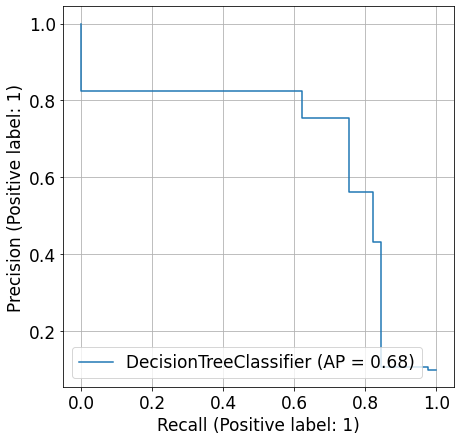

In [83]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
plot_precision_recall_curve(tree, X_test, y_test, ax=ax) 
plt.grid(True)
plt.show()

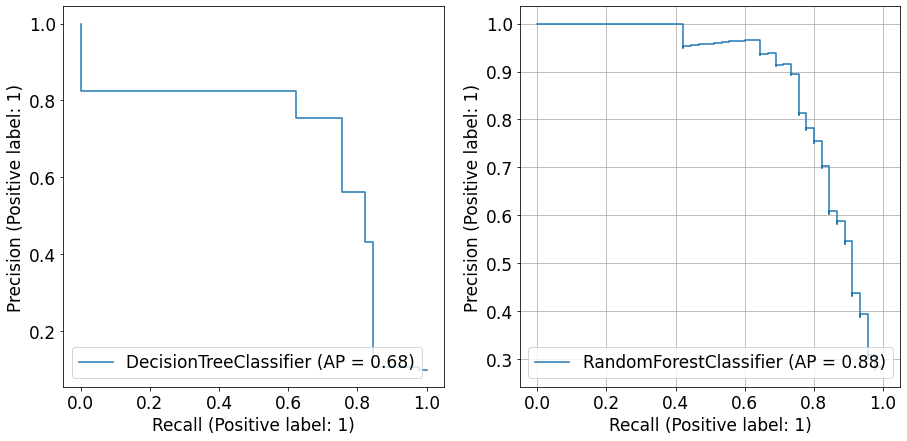

In [88]:
fig, ax = plt.subplots(1,2,figsize=(15,7))
plot_precision_recall_curve(tree, X_test, y_test, ax=ax[0])
plot_precision_recall_curve(rf, X_test, y_test, ax=ax[1])
plt.grid(True)
plt.show()

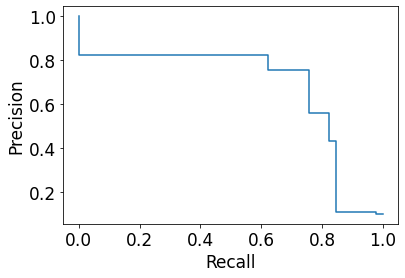

In [96]:
#버전때문에 해당 방법을 사용하는것을 추천함
from sklearn.metrics import PrecisionRecallDisplay

disp = PrecisionRecallDisplay(precision1, recall1)
disp.plot();


In [ ]:
#두개의 모델 확인하기

In [113]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, average_precision_score

#decision tree/randomforest 모델을 이용해 positive 확률

tree_pos = tree.predict_proba(X_test)[:, 1]
rf_pos= rf.predict_proba(X_test)[:, 1]

precision1, recall1, threshold1 = precision_recall_curve(y_test, tree_pos) #정답, pos 확률
precision2, recall2, threshold2 = precision_recall_curve(y_test, rf_pos) #정답, pos 확률

print(precision1.shape, recall1.shape, threshold1.shape)

(8,) (8,) (7,)


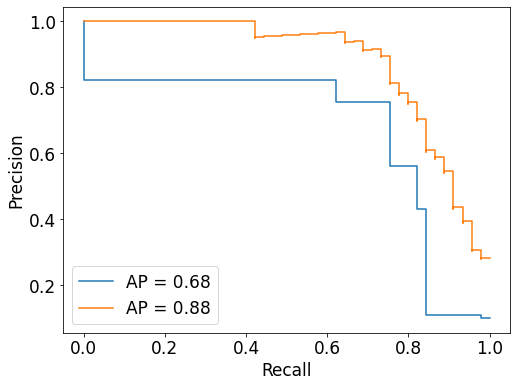

In [114]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score
plt.figure(figsize=(8,6))
ax=plt.gca()
ap_tree = average_precision_score(y_test, tree_pos)
disp = PrecisionRecallDisplay(precision1, recall1, average_precision=ap_tree)
disp.plot(ax=ax)

#randomforest
ap_rf = average_precision_score(y_test, rf_pos)
disp2 = PrecisionRecallDisplay(precision2, recall2, average_precision=ap_rf)
disp2.plot(ax=ax);

## ROC curve(Receiver Operating Characteristic Curve)와 AUC(Area Under the Curve) score

- **FPR(False Positive Rate-위양성율)**
    - 위양성율 (fall-out)
    - 1-특이도(TNR)
    - 실제 음성중 양성으로 잘못 예측 한 비율
    $$
    \cfrac{FP}{TN+FP}
    $$
- **TPR(True Positive Rate-재현율/민감도)** 
    - 재현율(recall)
    - 실제 양성중 양성으로 맞게 예측한 비율
    $$
    \frac{TP}{FN+TP}
    $$
- **ROC 곡선**
    - 2진 분류의 모델 성능 평가 지표 중 하나.
    - 불균형 데이터셋을 평가할 때 사용.
    - FPR을 X축, TPR을 Y축으로 놓고 임계값을 변경해서 FPR이 변할 때 TPR이 어떻게 변하는지 나타내는 곡선.
- **AUC**
    - ROC 곡선 아래쪽 면적
    - 0 ~ 1 사이 실수로 나오며 클수록 좋다.
   - **AUC 점수기준**
        - 1.0 ~ 0.9 : 아주 좋음
        - 0.9 ~ 0.8 : 좋음
        - 0.8 ~ 0.7 : 괜찮은 모델
        - 0.7 ~ 0.6 : 의미는 있으나 좋은 모델은 아님
        - 0.6 ~ 0.5 : 좋지 않은 모델
        - 0.5밑으로 나오는 것은 매우매우 안좋은 모델이라는 것

In [ ]:
#recall(TPR)과 FPR(위양성율)은 비례관계
"""
recall(TPR)이 높으면 실제 positive 대비 예측력이 높다는 것
RPF이 낮으면 실제 negative 대비 예측력이 높다는 것

AP는 긍정에 대해서만 분류를 잘한다는 것
AUC(ROC) score가 높다는 것은 positive와 negative 분류를 둘다 잘한다는 것

FPR이 낮으면 negative를 잘맞춘다는 의미 (실제 틀린것 대비 예측한 틀린것의 비율)
TPR(Recall)이 높으면 positive를 잘 맞춘다는 의미
"""

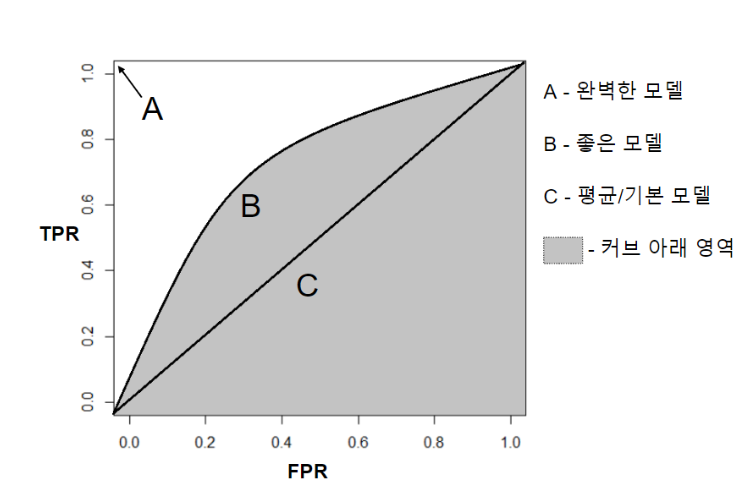

가장 완벽한 것은 FPR이 0이고 TPR이 1인 것이다. 
일반 적으로 FPR이 작을 때 (0에 가까울때) TPR이 높은 경우가 좋은 상황이다. 그래서 선 아래의 면적이 넓은 곡선이 나올 수록 좋은 모델이다.

### ROC, AUC 점수  확인
- roc_curve(y값, 예측확률) : FPR, TPR, Thresholds (임계치)
- roc_auc_score(y값, 예측확률) : AUC 점수 반환

## ROC Curve - Precision_Recall Curve
- ROC Curve
    - 이진분류에서 양성클래스 탐지와 음성클래스 탐지의 중요도가 비슷할 때 사용(개고양이 분류)
- Precision Recall curve
    - 양성클래스 탐지가 음성클래스 탐지의 중요도보다 높을 경우 사용(암환자 진단)

In [117]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

tree_pos = tree.predict_proba(X_test)[:, 1]
rf_pos= rf.predict_proba(X_test)[:, 1]

fprs_tree, tprs_tree, thresholds_tree = roc_curve(y_test, tree_pos)
fprs_rf, tprs_rf, thresholds_rf = roc_curve(y_test, rf_pos)

print(fprs_tree.shape, tprs_tree.shape, thresholds_tree.shape) #임계값이 8번 바뀐것
print(fprs_rf.shape, tprs_rf.shape, thresholds_rf.shape) #임계값이 34번 바뀐것 

(8,) (8,) (8,)
(34,) (34,) (34,)


In [118]:
pd.DataFrame({
    "Threshold":thresholds_tree,
    "FPR": fprs_tree,
    "TPR": tprs_tree
})
#FPR은 늦게 커질수록 좋고 TPR은 일찍이서부터 커질수록 좋음

,Threshold,FPR,TPR
0,1.750000,0.000000,0.000000
1,0.750000,0.014815,0.622222
2,0.545455,0.027160,0.755556
3,0.149254,0.071605,0.822222
4,0.040000,0.086420,0.822222
5,0.033898,0.123457,0.844444
6,0.013043,0.901235,0.977778
7,0.008264,1.000000,1.000000


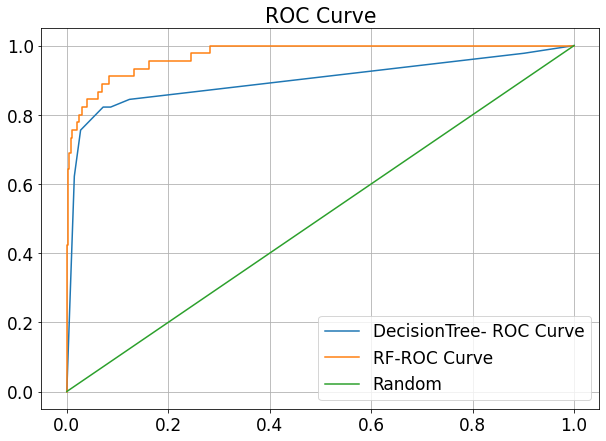

In [125]:
plt.figure(figsize=(10,7))
plt.plot(fprs_tree, tprs_tree, label='DecisionTree- ROC Curve')
plt.plot(fprs_rf, tprs_rf, label='RF-ROC Curve')
plt.plot([0,1], [0,1], label='Random')

plt.legend(loc='lower right')
plt.grid(True)
plt.title('ROC Curve')
plt.show()

#RF-ROC 커브가 가장 좋은 모델임

In [127]:
# roc auc score
from sklearn.metrics import roc_auc_score
print("DecisionTree roc auc점수:", roc_auc_score(y_test, tree_pos))
print("RandomForest roc auc점수:", roc_auc_score(y_test, rf_pos))

DecisionTree roc auc점수: 0.8975308641975308
RandomForest roc auc점수: 0.9731138545953362


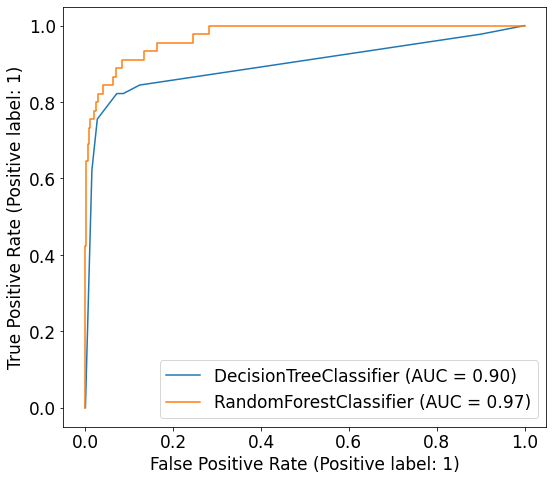

In [129]:
# plot_roc_curve
from sklearn.metrics import plot_roc_curve
fig, ax = plt.subplots(1,1, figsize=(8,7))
plot_roc_curve(tree, X_test, y_test, ax=ax)
plot_roc_curve(rf, X_test, y_test, ax=ax)

plt.tight_layout()
plt.show()

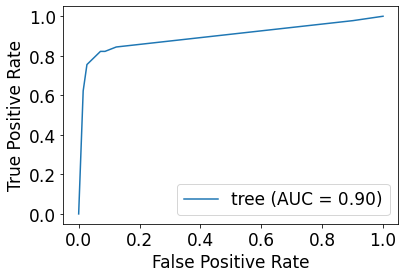

In [134]:
from sklearn.metrics import RocCurveDisplay
auc = roc_auc_score(y_test, tree_pos)
disp = RocCurveDisplay(fpr=fprs_tree, tpr= tprs_tree, roc_auc=auc, estimator_name = 'tree')
disp.plot();

# TODO
- breast_cancer data 모델링
1. breast cancer data 로딩 및 
1. train/test set으로 분리
1. 모델링 (DecisionTreeClassifier(max_depth=3), RandomForestClassifier(max_depth=2, n_estimators=200)
1. 평가 (Train/Test set)
    - 평가지표
        - accuracy, recall, precision, f1 score, confusion matrix
        - PR curve 그리고 AP 점수 확인
        - ROC curve 그리고 AUC 점수확인

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, recall_score, precision_score,
                             f1_score, confusion_matrix, ConfusionMatrixDisplay,
                             precision_recall_curve, PrecisionRecallDisplay, 
                             roc_curve, RocCurveDisplay, average_precision_score,
                             roc_auc_score)
from matplotlib import pyplot as plt

In [2]:
X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   stratify=y, random_state=0)

X_train.shape, y_train.shape

((455, 30), (455,))

In [3]:
#y_class 분포
np.unique(y, return_counts=True)
np.unique(y, return_counts=True)[1]/y.size

array([0.37258348, 0.62741652])

In [4]:
#모델 생성 및 학습
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
rf = RandomForestClassifier(max_depth=2, n_estimators=200, random_state=0)
tree.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=200, random_state=0)

In [5]:
#추론 
pred_train_tree = tree.predict(X_train) #최종 class 예측
pred_test_tree = tree.predict(X_test)

pred_train_prob_tree = tree.predict_proba(X_train)[:,1] #확률 예측(positive 확률만)
pred_test_prob_tree = tree.predict_proba(X_test)[:,1]

pred_train_rf = rf.predict(X_train)
pred_test_rf = rf.predict(X_test)

pred_train_prob_rf = rf.predict_proba(X_train)[:,1]
pred_test_prob_rf = rf.predict_proba(X_test)[:,1]

In [6]:
def print_matrix(y, pred, prob, title):
    """
    분류평가 출력 함수
    [parameter]
    y : ndarray - 정답
    pred:ndarray - 예측 양성 확률
    title:str - 제목
    """
    print(title)
    print('정확도(accuracy): ', accuracy_score(y, pred))
    print('재현율(recall): ', recall_score(y,pred))
    print('정밀도(precision): ', precision_score(y, pred))
    print('f1점수: ', f1_score(y, pred))
    
    print('AP점수: ', average_precision_score(y, prob))
    print('AUC점수: ', roc_auc_score(y, prob))

In [7]:
print_matrix(y_train, pred_train_tree, pred_train_prob_tree, 'DecisionTree train set')

DecisionTree train set
정확도(accuracy):  0.9736263736263736
재현율(recall):  0.9964912280701754
정밀도(precision):  0.9627118644067797
f1점수:  0.9793103448275863
AP점수:  0.9842102478389377
AUC점수:  0.9863261093911249


In [8]:
print_matrix(y_train, pred_train_rf, pred_train_prob_rf, 'Randomforest train set')

Randomforest train set
정확도(accuracy):  0.9692307692307692
재현율(recall):  0.9859649122807017
정밀도(precision):  0.9656357388316151
f1점수:  0.9756944444444443
AP점수:  0.9973840556546545
AUC점수:  0.9957481940144479


In [9]:
print_matrix(y_test, pred_test_rf, pred_test_prob_rf, 'Randomforest test set')

Randomforest test set
정확도(accuracy):  0.9385964912280702
재현율(recall):  0.9444444444444444
정밀도(precision):  0.9577464788732394
f1점수:  0.951048951048951
AP점수:  0.977122126791544
AUC점수:  0.9718915343915344


In [10]:
#confusion matrix
confusion_matrix(y_train, pred_train_tree)

array([[159,  11],
       [  1, 284]], dtype=int64)

In [11]:
def Display_confusion_matrix(y, pred, title):
    """
    confusion_matrix 시각화    
    """
    cm = confusion_matrix(y, pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap='Blues')

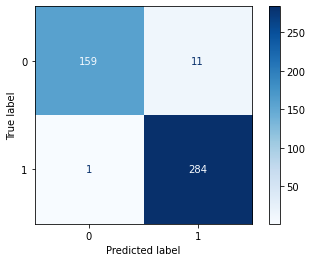

In [12]:
Display_confusion_matrix(y_train, pred_train_tree, 'DecisionTree-Trainset')

In [13]:
#PrecisionRecall curve
def display_pr_curve(y, prob, title):
    """
    precision recall curve 시각화
    """
    pre, recall, _ = precision_recall_curve(y, prob) #_는 threshold
    ap_score = average_precision_score(y, prob)
    disp = PrecisionRecallDisplay(pre, recall, average_precision=ap_score)
    disp.plot()
    plt.title(title)
    plt.grid(True)

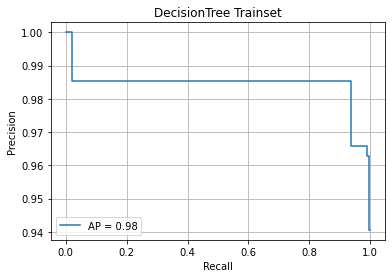

In [14]:
display_pr_curve(y_train, pred_train_prob_tree, "DecisionTree Trainset")

In [15]:
def display_roc_curve(y, prob, title):
    fpr, tpr, _ = roc_curve(y, prob)
    auc_score = roc_auc_score(y, prob)
    disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_score)
    disp.plot()
    plt.title(title)

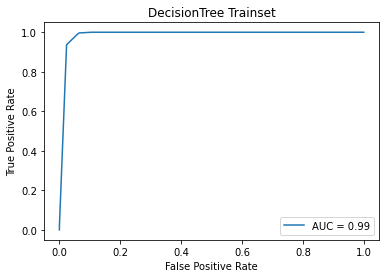

In [16]:
display_roc_curve(y_train, pred_train_prob_tree, "DecisionTree Trainset")